In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
img_path = []
dataset = os.listdir(r'DICOMImage/')
for i in dataset:
    temp = os.listdir(os.path.join('DICOMImage',i))
    for p in temp:
        images = os.listdir(os.path.join(os.path.join('DICOMImage',i),p))
        for img in images:
            if img.endswith('.jpg'):
                img_path.append(os.path.join(os.path.join(os.path.join('DICOMImage',i),p),img))

139


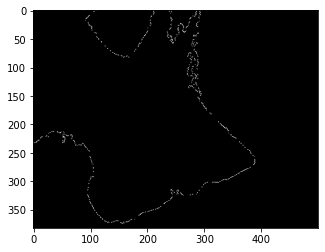

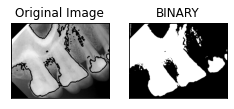

127


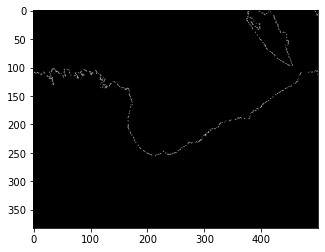

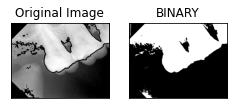

208


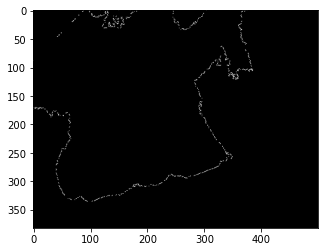

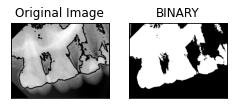

52


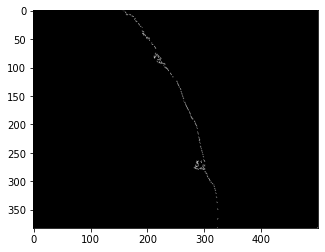

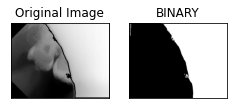

83


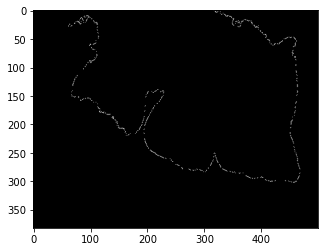

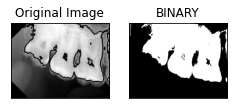

178


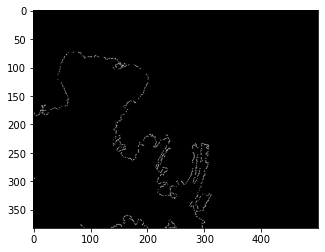

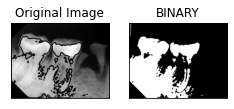

141


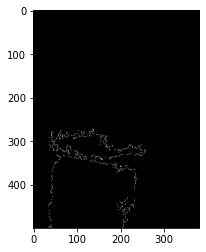

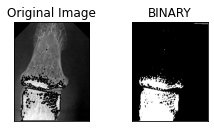

22


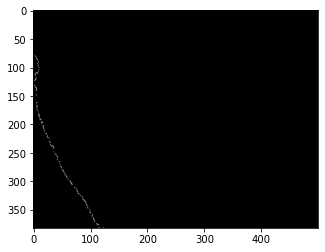

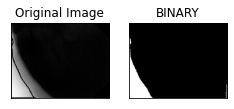

41


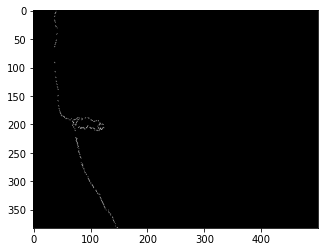

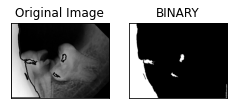

22


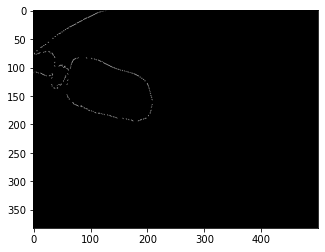

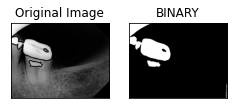

92


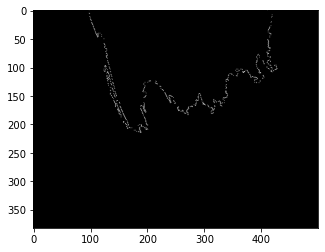

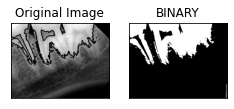

76


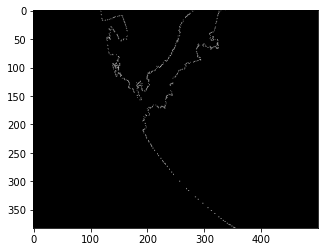

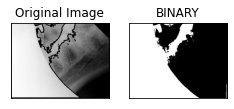

77


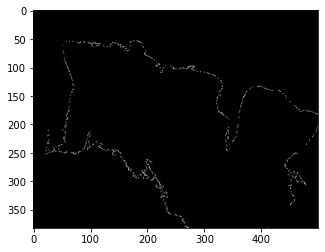

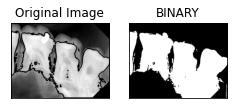

58


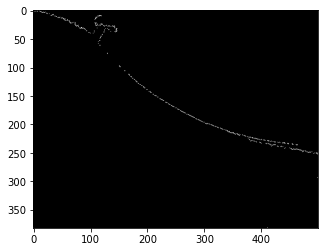

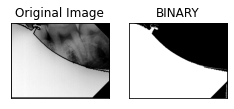

189


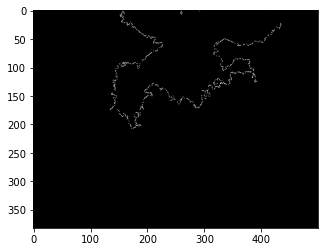

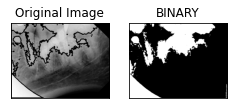

201


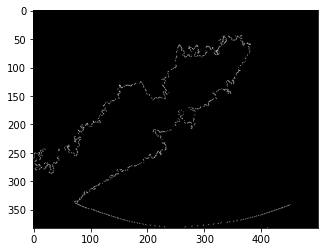

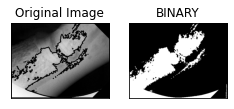

59


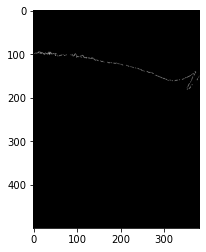

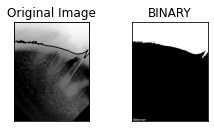

2723


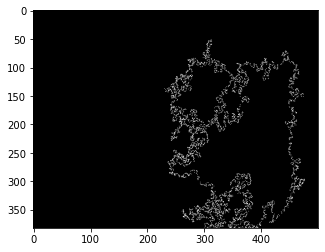

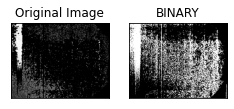

292


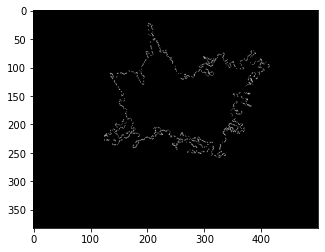

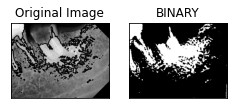

156


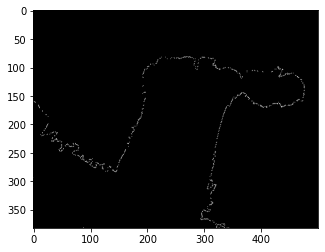

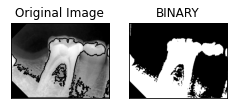

106


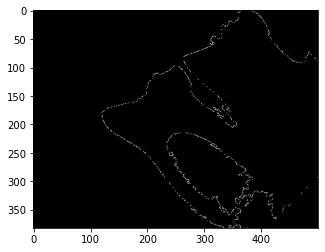

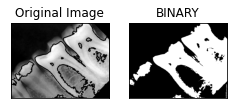

270


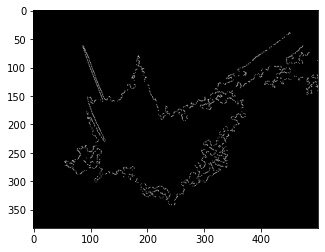

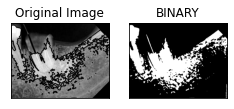

240


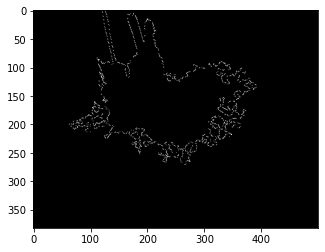

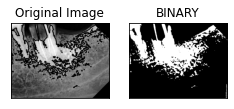

200


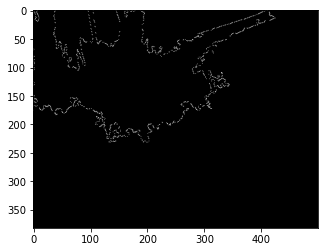

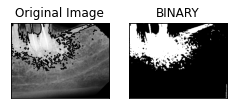

171


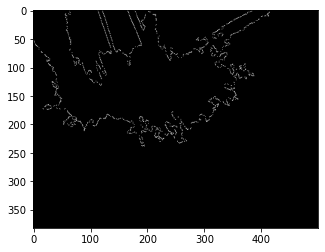

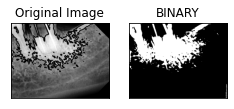

121


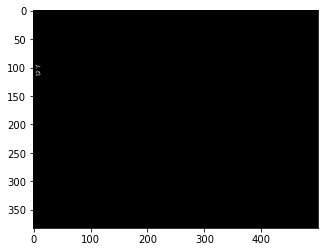

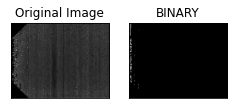

170


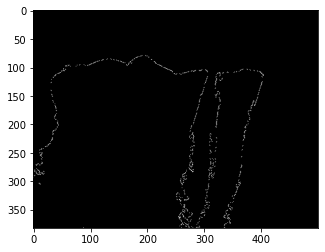

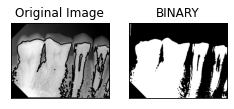

159


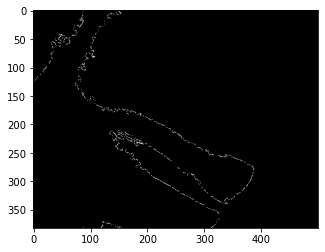

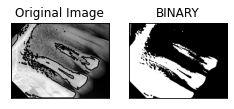

3302


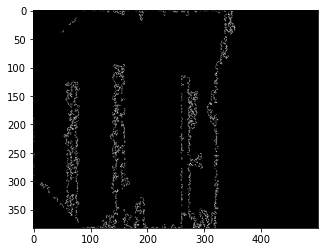

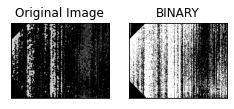

91


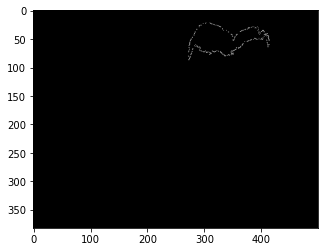

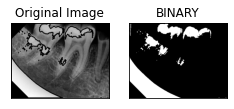

57


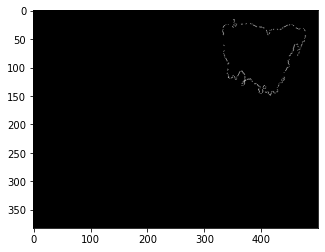

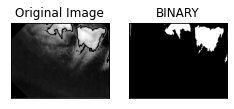

36


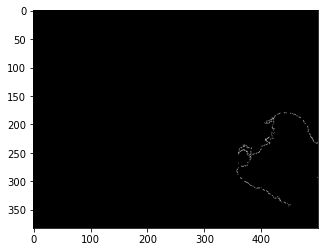

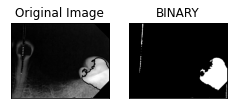

81


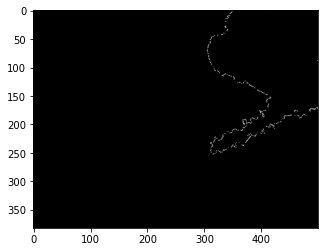

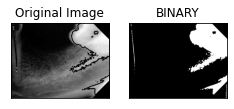

94


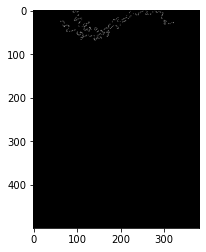

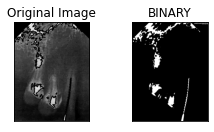

19


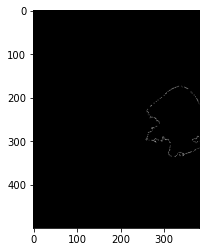

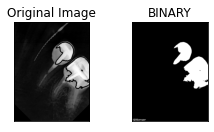

240


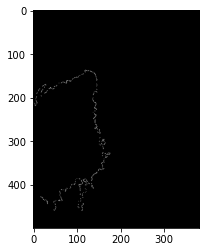

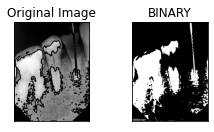

187


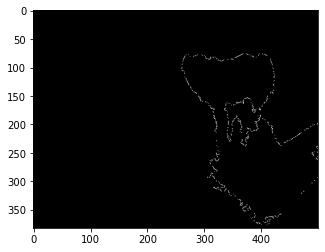

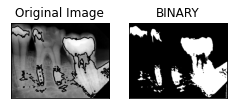

43


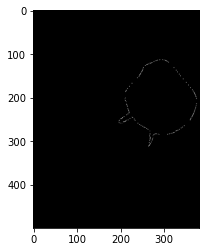

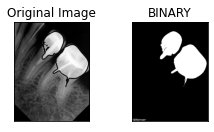

52


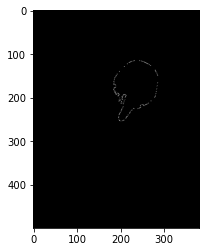

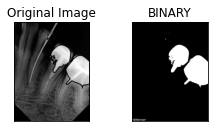

81


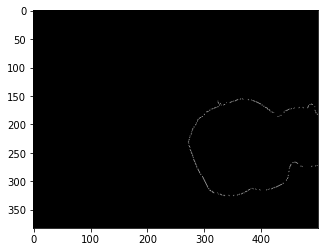

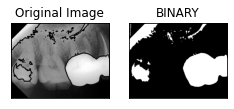

47


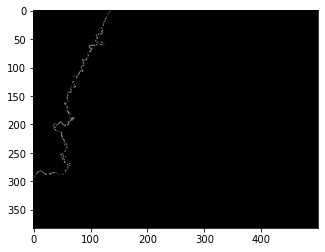

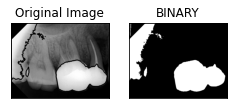

112


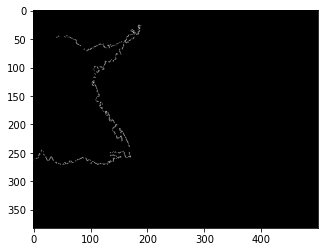

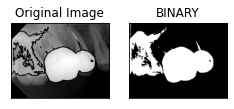

55


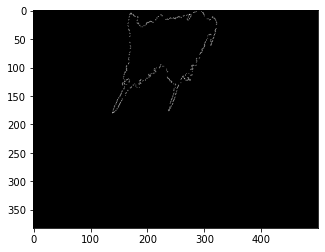

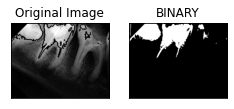

3401


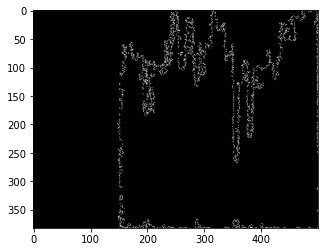

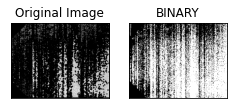

110


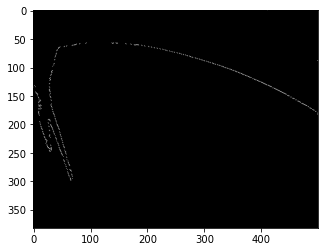

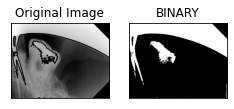

597


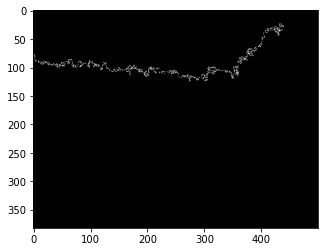

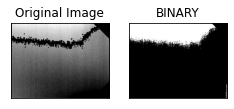

237


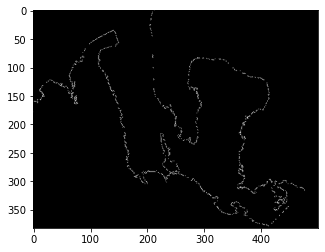

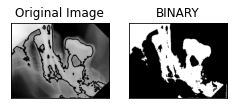

87


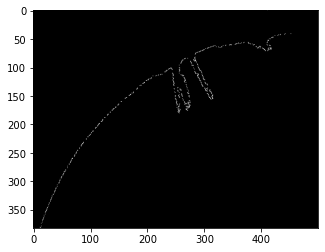

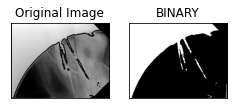

137


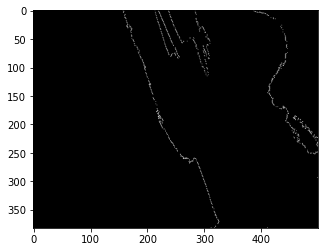

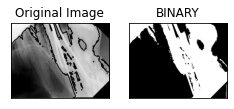

469


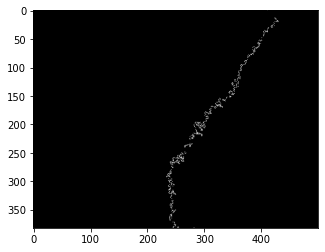

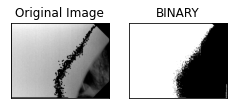

137


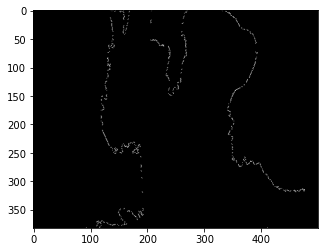

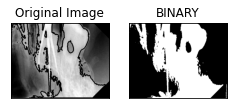

220


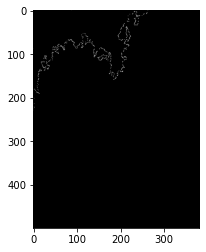

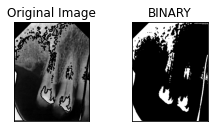

33


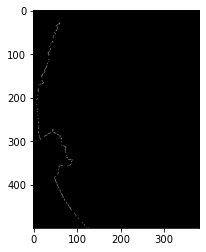

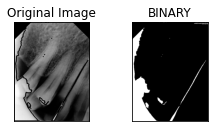

177


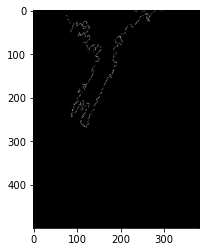

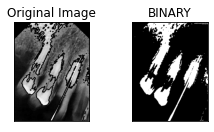

50


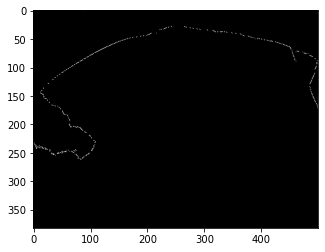

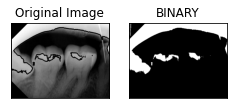

43


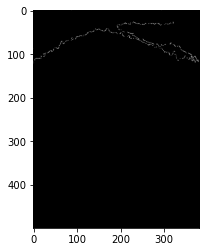

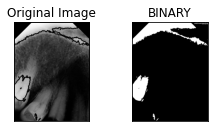

68


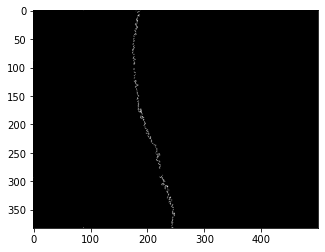

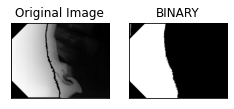

65


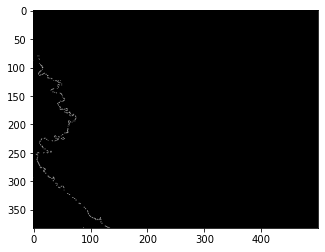

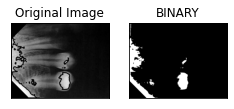

89


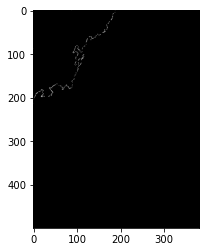

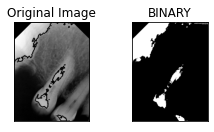

136


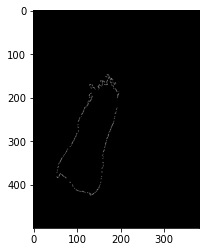

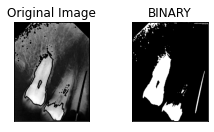

210


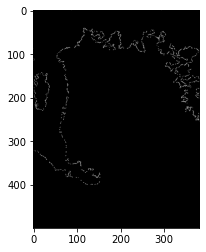

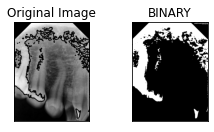

90


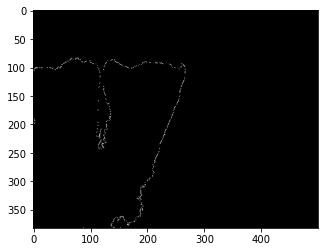

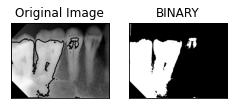

149


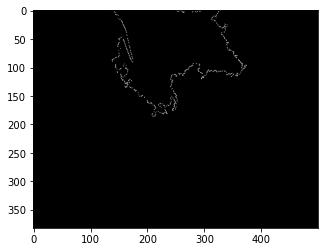

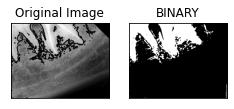

192


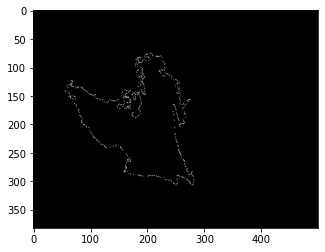

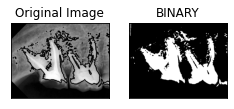

208


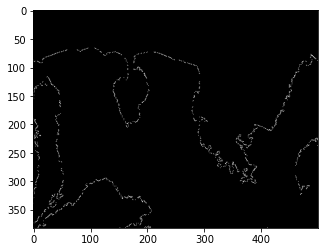

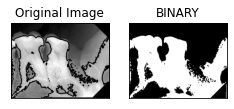

63


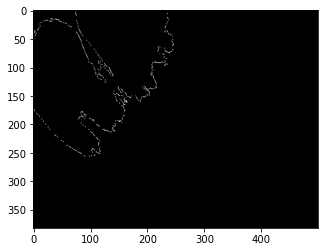

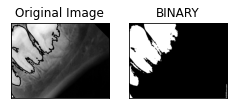

80


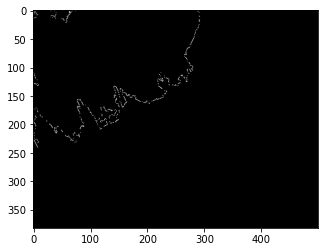

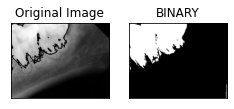

53


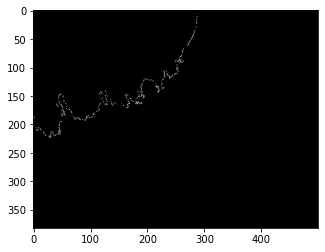

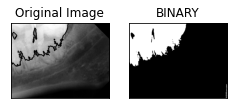

109


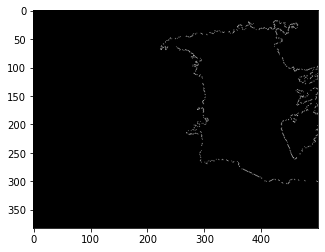

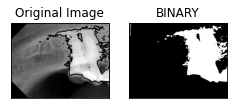

156


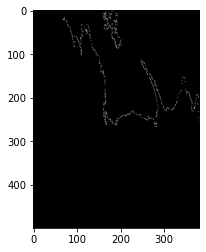

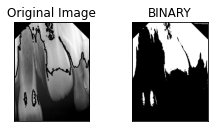

116


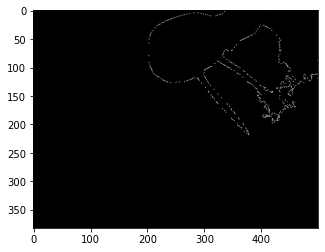

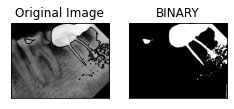

74


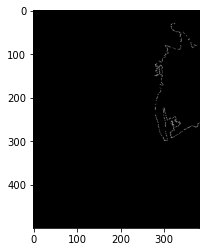

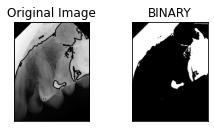

93


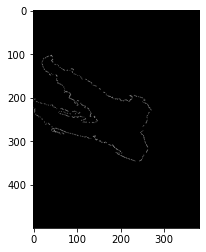

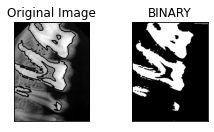

82


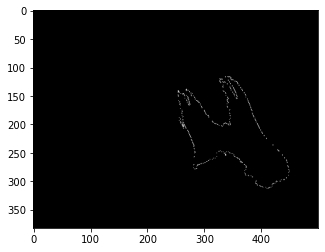

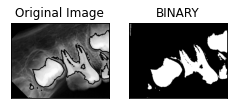

3297


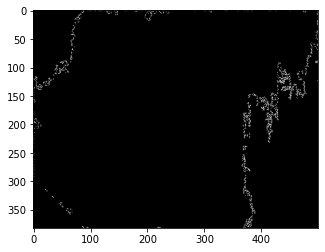

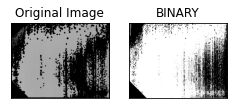

167


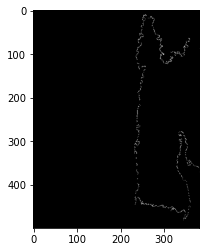

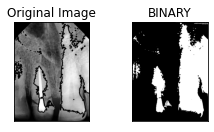

94


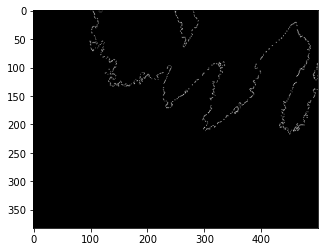

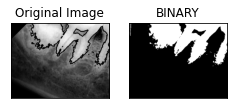

3306


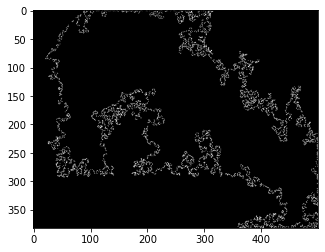

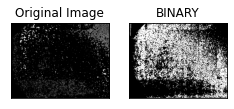

113


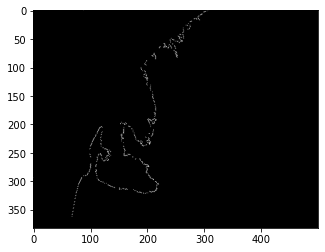

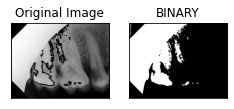

156


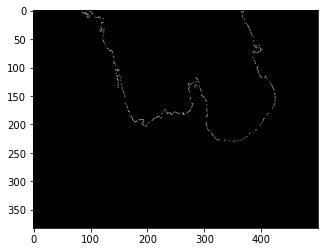

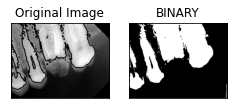

2848


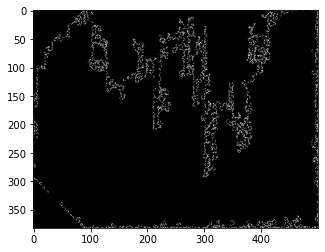

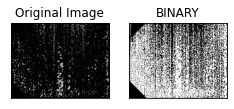

1373


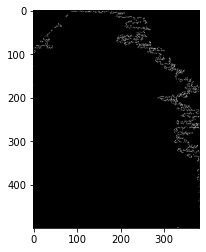

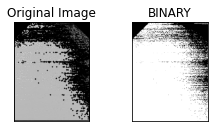

86


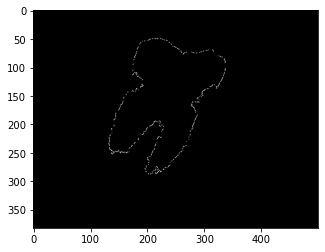

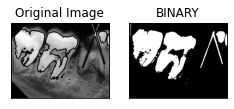

88


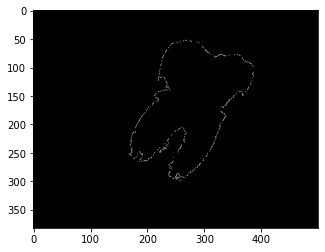

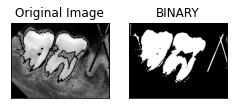

101


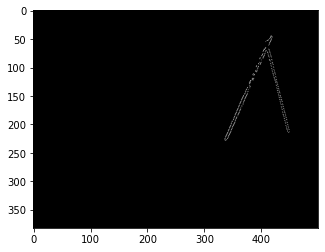

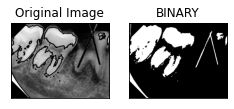

66


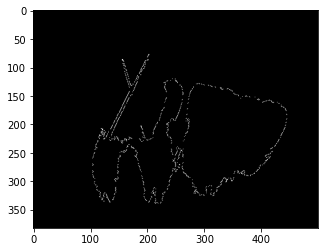

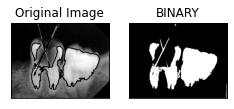

174


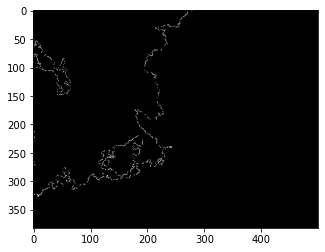

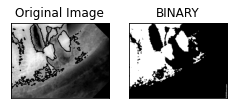

106


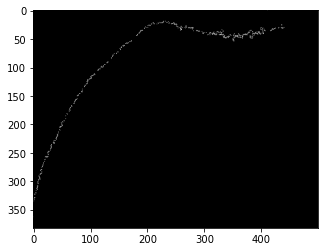

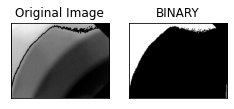

86


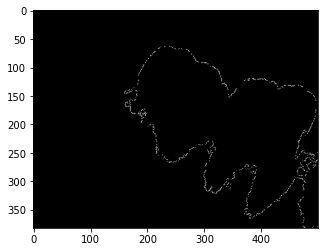

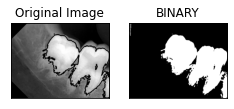

157


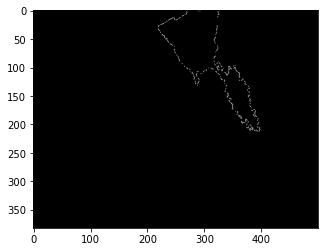

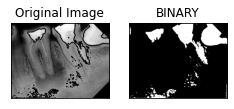

44


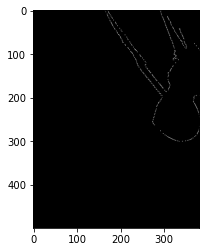

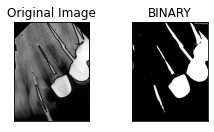

79


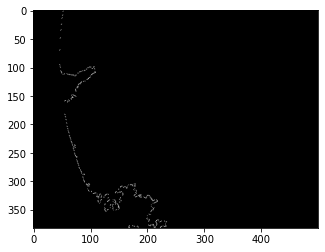

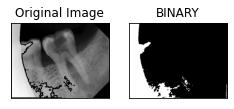

73


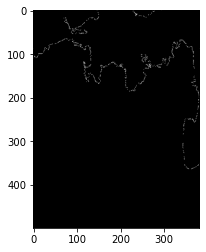

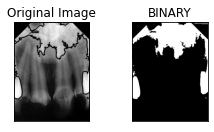

51


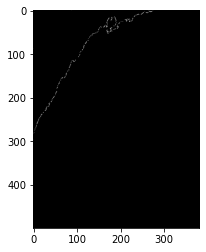

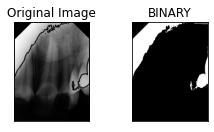

68


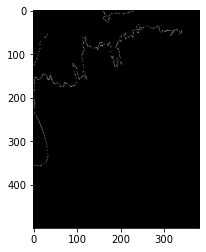

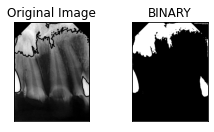

92


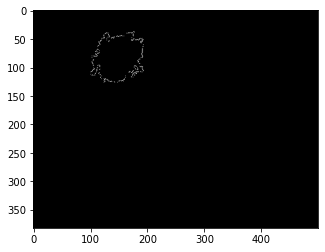

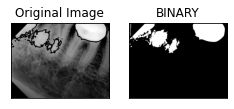

109


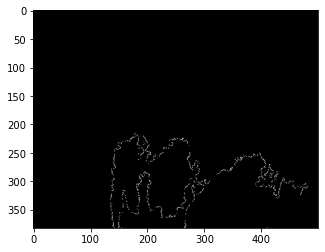

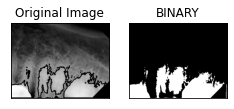

135


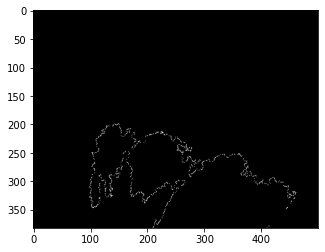

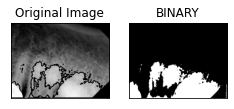

169


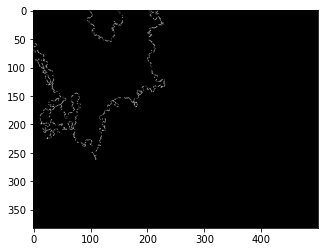

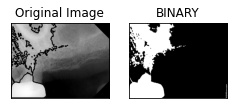

121


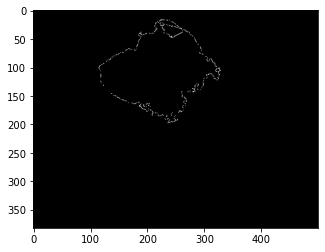

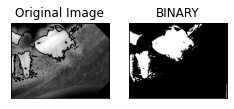

106


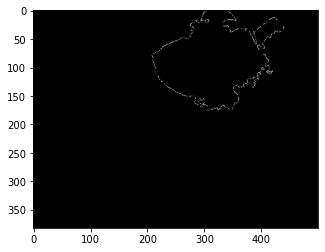

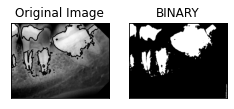

44


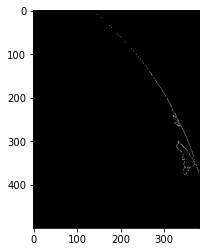

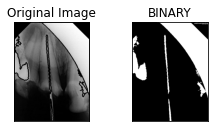

64


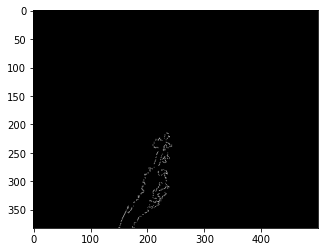

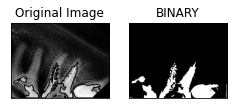

101


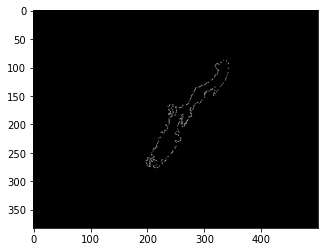

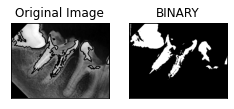

197


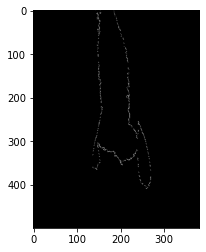

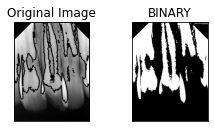

171


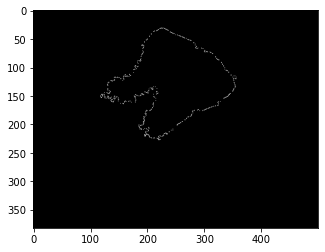

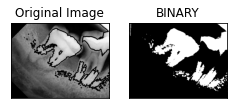

151


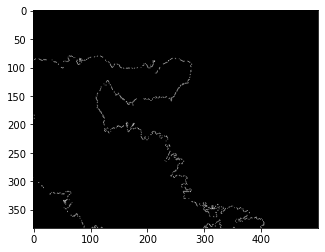

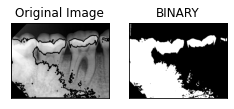

177


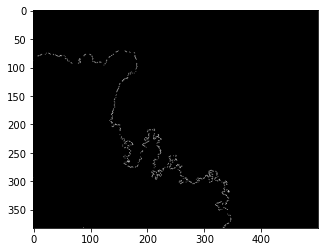

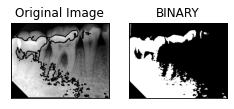

135


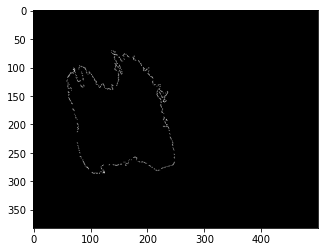

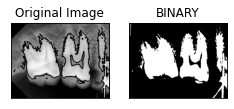

166


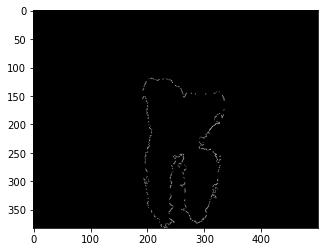

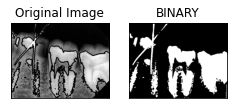

110


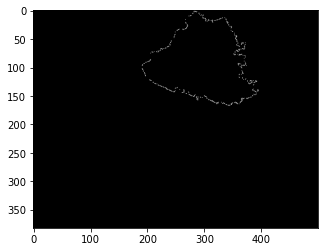

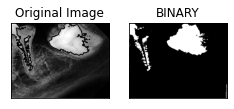

99


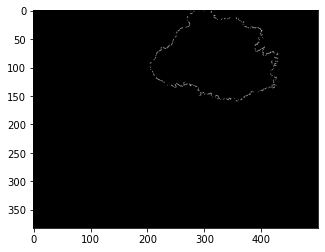

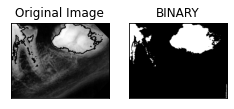

115


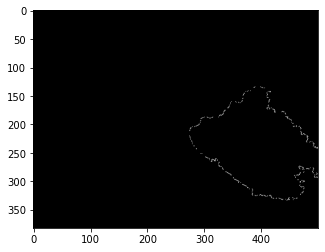

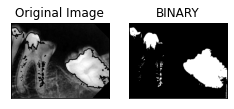

103


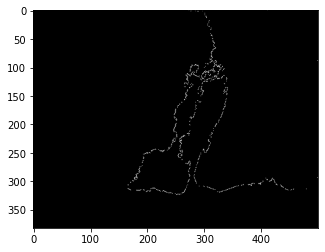

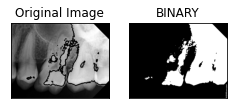

149


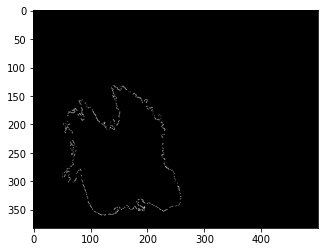

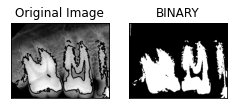

151


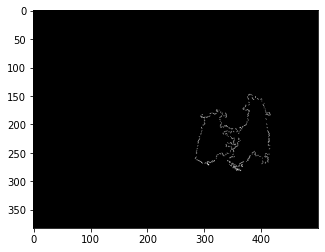

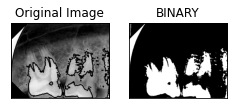

186


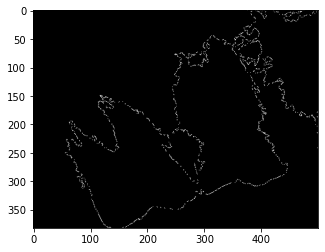

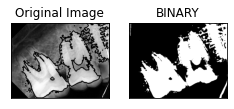

116


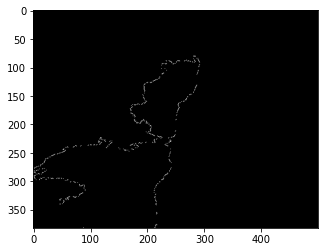

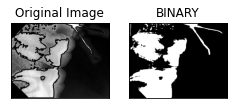

188


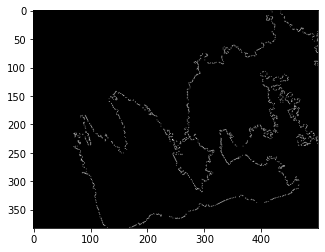

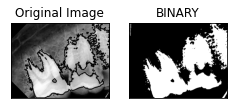

207


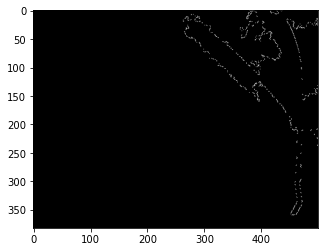

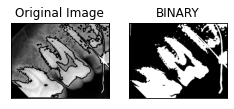

205


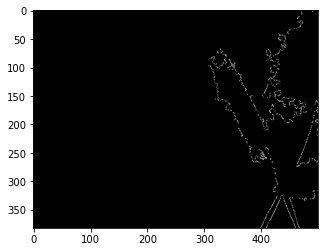

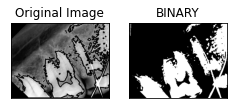

117


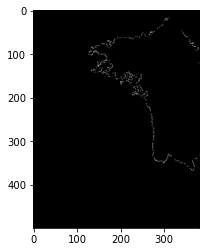

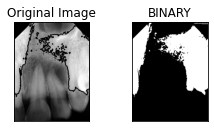

2993


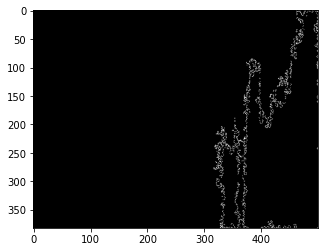

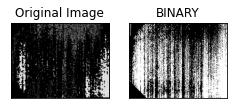

55


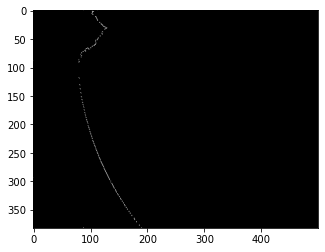

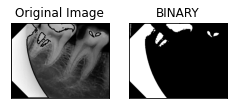

156


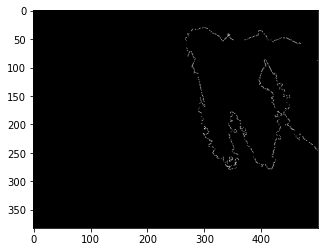

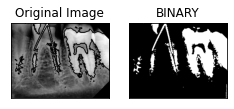

113


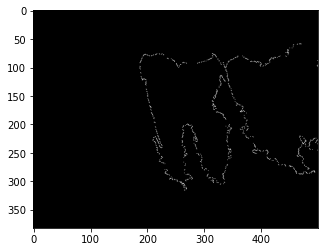

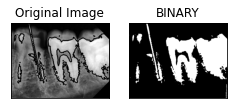

144


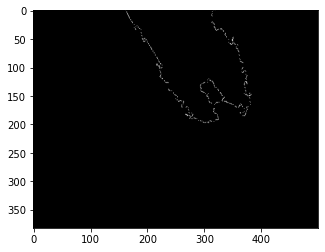

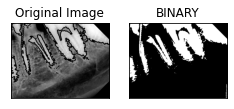

87


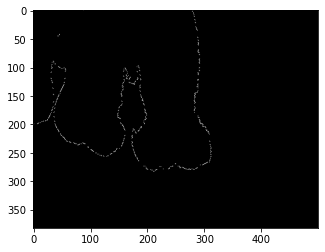

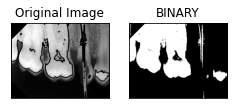

70


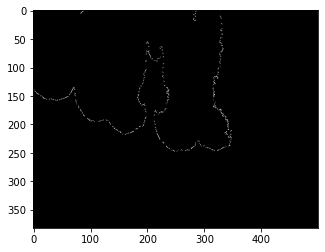

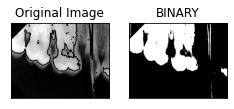

63


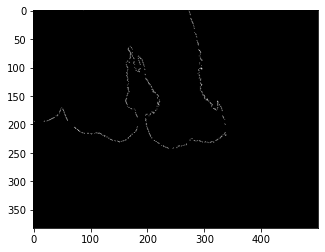

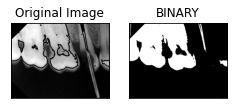

68


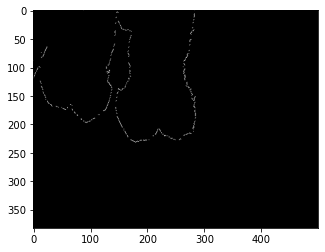

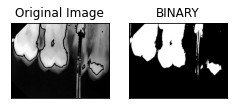

87


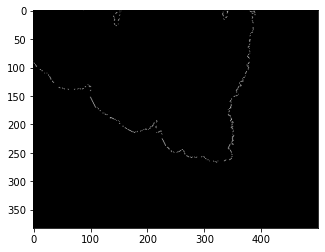

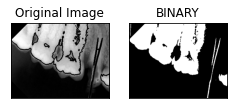

79


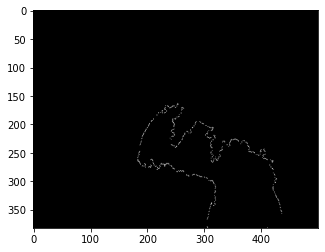

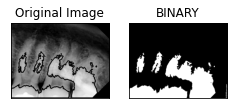

152


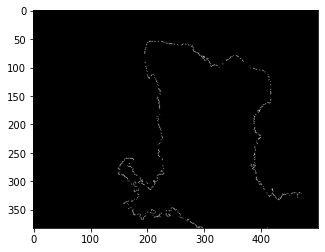

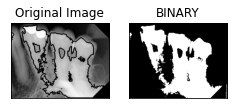

86


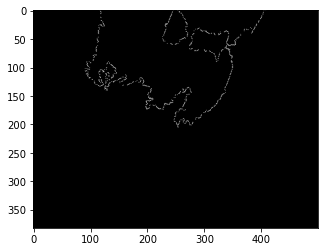

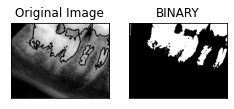

86


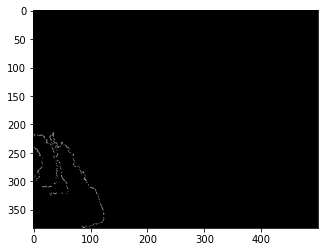

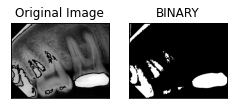

In [5]:
for img in img_path:
    tooth = cv2.imread(img,0)
    ret,thresh1 = cv2.threshold(tooth,160,200,cv2.THRESH_BINARY)
    temp = cv2.dilate(thresh1, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    titles = ['Original Image','BINARY']
    images = [tooth, thresh1]
    print(len(contours))
    cv2.drawContours(tooth, contours, -1, (0,255,0), 3)
    largestCnt = []
    for cnt in contours:
        if (len(cnt) > len(largestCnt)):
            largestCnt = cnt
        # Determine center of area of largest contour
    M = cv2.moments(largestCnt)
    x = int(M["m10"] / M["m00"])
    y = int(M["m01"] / M["m00"])

    # Initiale mask for flood filling
    width, height = temp.shape
    mask = img2 = np.ones((width + 2, height + 2), np.uint8) * 255
    mask[1:width, 1:height] = 0
        # Generate intermediate image, draw largest contour, flood filled
    temp = np.zeros(temp.shape, np.uint8)
    temp = cv2.drawContours(temp, largestCnt, -1, 255, cv2.FILLED)
    cv2.imwrite('output/2.jpg',temp)
    plt.imshow(temp,'gray')
    plt.show()
    _, temp, mask, _ = cv2.floodFill(temp, mask, (x, y), 255)
    for i in range(2):
        cv2.imwrite(f'output/{i}.jpg',images[i])
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])

    plt.show()

In [4]:
import cv2
import numpy as np
import glob

class MyObj():
    template = None
    w = None
    h = None

def tooth(temp,c):
    res = cv2.matchTemplate(img_gray, temp.template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.95
    loc = np.where(res >= threshold)
    if(len(loc)==0):
        return
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, (pt[0]+7,pt[1]+7), (pt[0] + temp.w - 7, pt[1] + temp.h - 7), (0, 0, 255), 2)
        cv2.rectangle(img_gray, pt, (pt[0] + temp.w, pt[1] + temp.h), (0, 0, 255), -1)
        cv2.imshow("NJK",img_gray)
        cv2.waitKey()
        c += 1
        break
    tooth(temp,c)

img_rgb = cv2.imread('Target.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

files = glob.glob("./Tooth_images/*")

MyTemplateList = []

for pth in files:
    temp = MyObj()
    temp.template = cv2.imread(pth,0)
    w, h = temp.template.shape[::-1]
    temp.w = w
    temp.h = h
    MyTemplateList.append(temp)

print(len(MyTemplateList))
#template = cv2.imread('coin.jpg',0)
#w, h = template.shape[::-1]
c=0
for temp in MyTemplateList:
    tooth(temp,c)
print(c," teeth detected.")

cv2.imwrite('res2.png',img_rgb)

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
